In [1]:
%matplotlib inline
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

#convert day to datetime type
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
df.dob = pd.to_datetime(df.dob)
df.dtypes

team                  object
player                object
position               int64
dob           datetime64[ns]
tour                  object
start         datetime64[ns]
end           datetime64[ns]
place                  int64
prize                float64
startelo64           float64
endelo64             float64
dtype: object

In [3]:
df.head()

,team,player,position,dob,tour,start,end,place,prize,startelo64,endelo64
0,Infamous,kotarhayama,1,1997-01-31,Galaxy Battles II: Emerging Worlds,2018-01-19,2018-01-21,7,20000.0,1172.69492,1170.334653
1,Infamous,papita,2,1995-01-19,Galaxy Battles II: Emerging Worlds,2018-01-19,2018-01-21,7,20000.0,1172.69492,1170.334653
2,Infamous,stinger,3,1996-12-15,Galaxy Battles II: Emerging Worlds,2018-01-19,2018-01-21,7,20000.0,1172.69492,1170.334653
3,Infamous,scofield,4,1998-04-29,Galaxy Battles II: Emerging Worlds,2018-01-19,2018-01-21,7,20000.0,1172.69492,1170.334653
4,Infamous,masoku,5,NaT,Galaxy Battles II: Emerging Worlds,2018-01-19,2018-01-21,7,20000.0,1172.69492,1170.334653


In [4]:
df.describe()

,position,place,prize,startelo64,endelo64
count,9240.000000,9240.000000,9.240000e+03,6228.000000,6627.000000
mean,3.021320,4.147511,6.490698e+04,1171.028488,1167.608950
std,1.421953,2.660254,4.296791e+05,125.393771,135.953683
min,1.000000,1.000000,1.600000e+02,781.374334,785.675617
25%,2.000000,3.000000,2.000000e+03,1086.352908,1079.490853
50%,3.000000,3.000000,7.000000e+03,1174.284373,1163.229496
75%,4.000000,5.000000,2.500000e+04,1254.130662,1254.714235
max,5.000000,21.000000,1.086268e+07,1536.900227,1554.769362


In [21]:
df.endelo64.fillna(0)

0       1170.334653
1       1170.334653
2       1170.334653
3       1170.334653
4       1170.334653
5       1237.686995
6       1237.686995
7       1237.686995
8       1237.686995
9       1237.686995
10      1237.686995
11      1153.177713
12      1153.177713
13      1153.177713
14      1153.177713
15      1153.177713
16      1205.797733
17      1205.797733
18      1205.797733
19      1205.797733
20      1205.797733
21      1128.298156
22      1128.298156
23      1128.298156
24      1128.298156
25      1128.298156
26      1196.405452
27      1196.405452
28      1196.405452
29      1196.405452
           ...     
9210       0.000000
9211       0.000000
9212       0.000000
9213       0.000000
9214       0.000000
9215       0.000000
9216       0.000000
9217       0.000000
9218       0.000000
9219       0.000000
9220       0.000000
9221       0.000000
9222       0.000000
9223       0.000000
9224       0.000000
9225       0.000000
9226       0.000000
9227       0.000000
9228       0.000000


In [5]:
#elo gain from each tournament
df['delo'] = df.endelo64 - df.startelo64
df.endelo64 = df.endelo64.fillna(0)
#cumulative sum of delo
cumsums = df[['player', 'start', 'delo']].groupby(['player', 'start']).sum().groupby(level=0).cumsum()
df = df.set_index(['player', 'start'])
df['rating'] = cumsums
df = df.reset_index()
df.head()

,player,start,team,position,dob,tour,end,place,prize,startelo64,endelo64,delo,rating
0,kotarhayama,2018-01-19,Infamous,1,1997-01-31,Galaxy Battles II: Emerging Worlds,2018-01-21,7,20000.0,1172.69492,1170.334653,-2.360267,99.623605
1,papita,2018-01-19,Infamous,2,1995-01-19,Galaxy Battles II: Emerging Worlds,2018-01-21,7,20000.0,1172.69492,1170.334653,-2.360267,97.516128
2,stinger,2018-01-19,Infamous,3,1996-12-15,Galaxy Battles II: Emerging Worlds,2018-01-21,7,20000.0,1172.69492,1170.334653,-2.360267,273.572345
3,scofield,2018-01-19,Infamous,4,1998-04-29,Galaxy Battles II: Emerging Worlds,2018-01-21,7,20000.0,1172.69492,1170.334653,-2.360267,97.516128
4,masoku,2018-01-19,Infamous,5,NaT,Galaxy Battles II: Emerging Worlds,2018-01-21,7,20000.0,1172.69492,1170.334653,-2.360267,84.370597


In [6]:
df.describe()

,position,place,prize,startelo64,endelo64,delo,rating
count,9240.000000,9240.000000,9.240000e+03,6228.000000,6627.000000,6203.000000,6061.000000
mean,3.021320,4.147511,6.490698e+04,1171.028488,1167.608950,-0.884857,125.399186
std,1.421953,2.660254,4.296791e+05,125.393771,135.953683,107.682022,556.059280
min,1.000000,1.000000,1.600000e+02,781.374334,785.675617,-395.885142,-1932.918038
25%,2.000000,3.000000,2.000000e+03,1086.352908,1079.490853,-66.620694,-123.659540
50%,3.000000,3.000000,7.000000e+03,1174.284373,1163.229496,-2.361491,52.086307
75%,4.000000,5.000000,2.500000e+04,1254.130662,1254.714235,56.378332,328.813390
max,5.000000,21.000000,1.086268e+07,1536.900227,1554.769362,379.634613,3109.431434


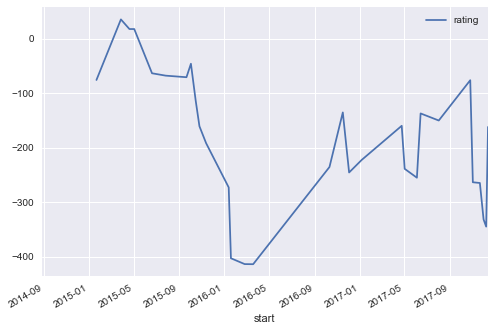

In [20]:
df[df['player'] == 'lil'][['rating', 'start']].set_index('start').plot()

In [ ]:
df[df['player'] == 'arteezy'][['rating', 'start']].set_index('start').plot()